# Messing with

+ Parameter passing methods
+ Return passing methods
+ Function Templates

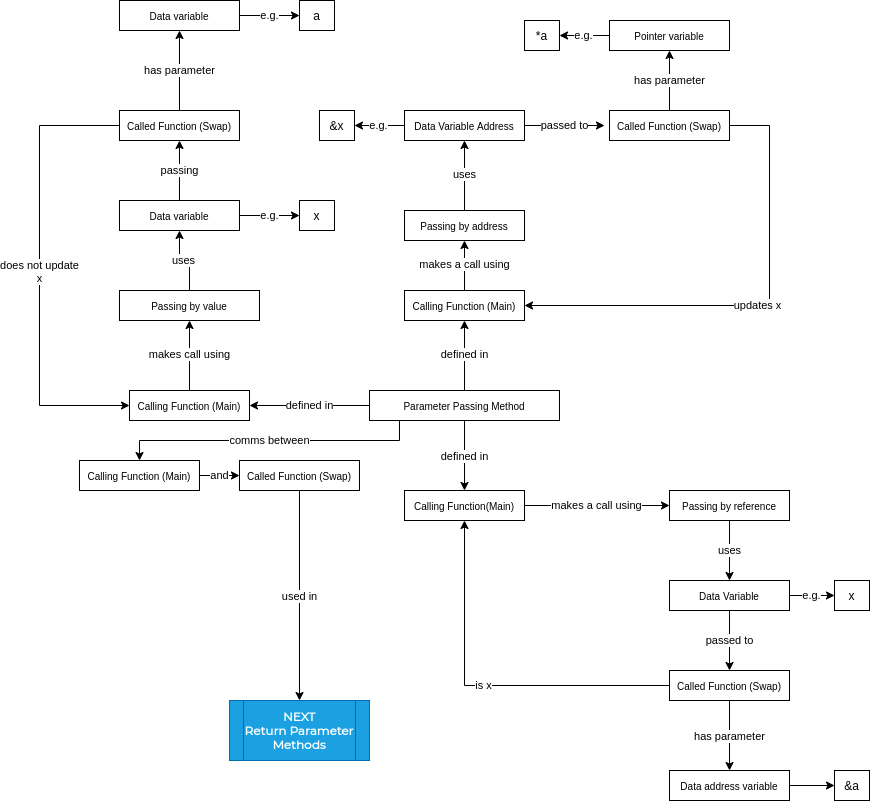







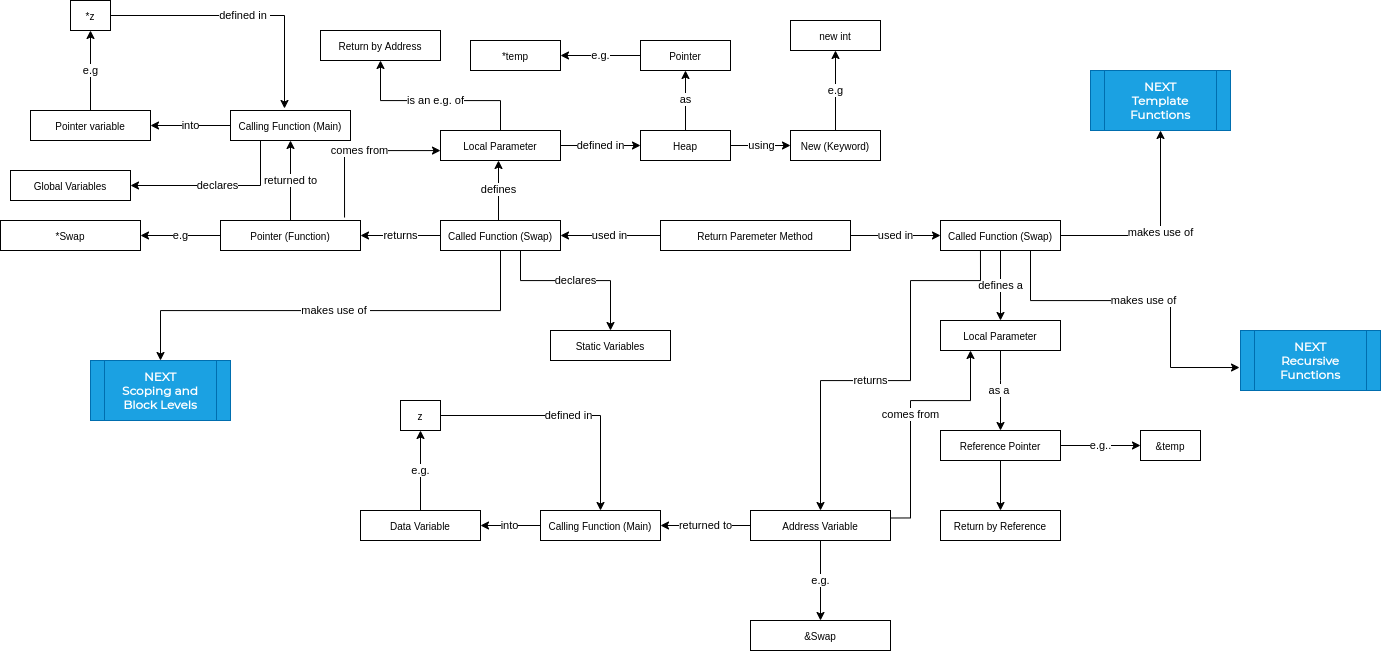

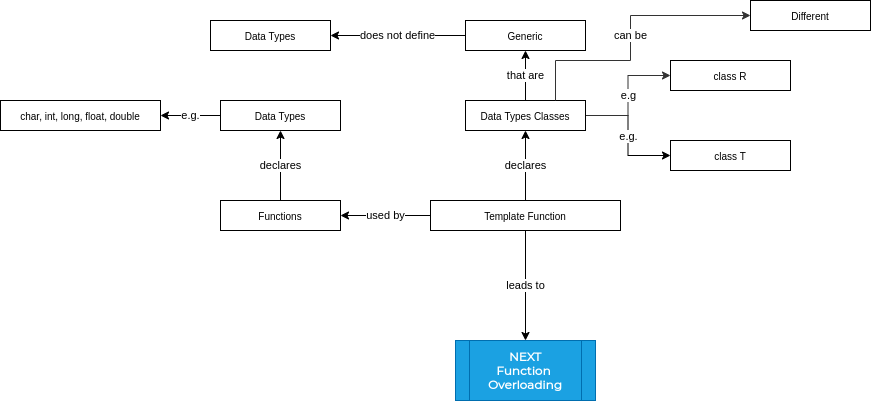

In [1]:
#include <iostream>
#include <climits>
#include <math.h>
#define INSERTION_OPERATOR operator<<
#define EXTRACTION_OPERATOR operator>>
#define ADDITION_OPERATOR operator+
using namespace std;

## Passing by Value (When function exits, variables scope also gets lost)
____

Nothing change, as when swap, exits, the variables looses scope

In [2]:
void Swap (int a, int b){
    int temp;
    temp = a;
    a=b;
    b=temp;
}
int x, y;
x=10;
y=20;
cout<<"x:"<<x<<" "<<"y:"<<y<<endl;
Swap(x,y);
cout<<"x:"<<x<<" "<<"y:"<<y<<endl;

x:10 y:20
x:10 y:20


## Passing by Address  (Variables outside function changes)
____

From main we pass the addredd to Swap, using ```&```. Swap still creates it variables in stack, but contents is the address to ```x_1``` and ```y_1```

And what is important, is that the lifetime of variable outside the scope of SWAP function.


In [3]:
void Swap_2 (int *a, int *b){
    int temp;
    temp = *a;
    *a=*b;
    *b=temp;
}
int x_1, y_1;
x_1=10;
y_1=20;
cout<<"x:"<<x_1<<" "<<"y:"<<y_1<<endl;
Swap_2(&x_1,&y_1);
cout<<"x:"<<x_1<<" "<<"y:"<<y_1<<endl;

x:10 y:20
x:20 y:10



It follows from defining a reference pointer to a variable. Can only be done this way, syntactically.

```
int x = 10;
int &y = x

Now I have a reference to address of x, and an alias of x is y, NO exrtra is allocated. Must be used with caution

```

Less code, for same outcome, as Passing by Address. But should be used with care.


In [4]:
void Swap_3 (int &a, int &b){
    int temp;
    temp = a;
    a=b;
    b=temp;
}
int x_2, y_2;
x_2=10;
y_2=20;
cout<<"x:"<<x_2<<" "<<"y:"<<y_2<<endl;
Swap_3(x_2,y_2);
cout<<"x:"<<x_2<<" "<<"y:"<<y_2<<endl;

x:10 y:20
x:20 y:10


## Return by Address  (Attempt 1)
____

Here we can see that we have assigned ```temp = a = 10```, but what is returned is garbage. Meaning it looses its scope, once the function exits, since this pointer address is in stack. We need to a new pointer in HEAP, so it keeps its state after exiting Swap

In [5]:
int *Swap_4 (int a, int b){
    int temp;
    temp = a;
    a=b;
    b=temp;
    return &temp;
}
int x_3, y_3, *z_3;
x_3=10;
y_3=20;

cout<<"a:"<<x_3<<endl;
z_3=Swap_4(x_3,y_3);
cout<<"z (Address):"<<z_3<<endl;
cout<<"z (Value):"<<*z_3<<endl;

input_line_12:6:13: warning: address of stack memory associated with local variable 'temp' returned [-Wreturn-stack-address]
    return &temp;
            ^~~~


a:10
z (Address):0x7ffe76c43bac
z (Value):32766


## Return by Address  (Attempt 2)
____

In order to keep the scope of temp alive outside Swap, we need to create temp in HEAP, and then return the reference as pointer.

Successfully temp = 10, is returned to main function.


In [6]:
int *Swap_5 (int a, int b){
    int *temp = new int ;
    *temp = a;
    a=b;
    b=*temp;
    return temp;
}
int x_4, y_4, *z_4;
x_4=10;
y_4=20;

cout<<"x (Address):"<<&x_4<<endl;
cout<<"x (Value):"<<x_4<<endl;
z_4=Swap_5(x_4,y_4);
cout<<"z (Address):"<<z_4<<endl;
cout<<"z (Value):"<<*z_4<<endl;



x (Address):0x7f286fa90050
x (Value):10
z (Address):0x55c65b2cd640
z (Value):10


@0x7f286fc13b60

## Return by Reference 
____

Works the same as "pass by reference", where the function "makes use" or in this case, function return value will be an addres, which us the ```& ```sign. The main program where the function is called is untouched.

In [7]:
int &Swap_6 (int &a, int &b){
    int &temp = a; //this is signature that must be remembered for passing by reference
    a=b;
    b=temp;
    return temp;
}
int x_5, y_5, z_5;
x_5=10;
y_5=20;

cout<<"x (Address):"<<&x_5<<endl;
cout<<"x (Value):"<<x_5<<endl;
z_5=Swap_6(x_5,y_5);
cout<<"z (Address):"<<z_5<<endl;
cout<<"z (Value):"<<&z_5<<endl;

x (Address):0x7f286fa90060
x (Value):10
z (Address):20
z (Value):0x7f286fa90068


## Template Functions
____

Content of function is same, but the parameter types differ. Then you can define a Template function.